# ĐỒ ÁN THỰC HÀNH

# Môn học: Lập trình cho Khoa học Dữ liệu

# Mã MH: CSC17104

# Thông tin đồ án
- Chủ đề: Tìm hiểu mức lương cho công việc Khoa học Dữ liệu qua các năm.
- Github: [Xem tại đây](https://github.com/HoangNguyen31/P4DS_Final-Project)

# Thông tin nhóm:
- Nhóm bao gồm các thành viên:
|<font size="3">MSSV</font>|<font size="3">Họ và tên</font>|
|--------------------------|-------------------------------|
|<font size="3">19120590</font>|<font size="3">Huỳnh Thanh Mỹ</font>|
|<font size="3">19120606</font>|<font size="3">Nguyễn Đình Hoàng Nguyên</font>|

# A. Thu nhập dữ liệu
1. Chủ đề của dữ liệu là gì và được lấy từ nguồn nào?
- Tên chủ đề: Mức lương cho công việc Khoa học Dữ liệu (Data Science Job Salaries).
- Nguồn dữ liệu: [Xem tại đây](https://salaries.ai-jobs.net/)
2. Tác giả có cho phép sử dụng dữ liệu này không?
- Toàn bộ tập dữ liệu được xuất bản trong phạm vi công cộng theo giấy phép CC0 (Domain Public)
3. Tác giả thu thập dữ liệu như thế nào?
- Trang web cung cấp cho người dùng một biểu mẫu ngắn để trả lời khảo sát về công việc và mức lương hiện tại trong lĩnh vực Khoa học Dữ liệu.

## Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# B. Khám phá dữ liệu

## 1. Đọc dữ liệu

In [2]:
df = pd.read_csv("./data/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Modeler,258700,USD,258700,US,0,US,M
1,2023,SE,FT,Data Modeler,146600,USD,146600,US,0,US,M
2,2023,MI,FT,Data Science Manager,190000,USD,190000,US,100,US,M
3,2023,MI,FT,Data Science Manager,160000,USD,160000,US,100,US,M
4,2023,EN,FT,Research Analyst,90000,USD,90000,US,100,US,M


## 2. Kích thước dữ liệu

In [3]:
num_rows, num_cols = df.shape
print("Số dòng:", num_rows)
print("Số cột:", num_cols)

Số dòng: 10456
Số cột: 11


## 3. Ý nghĩa từng dòng dữ liệu
- Mỗi dòng dữ liệu là thông tin về công ty và công việc của người khảo sát bao gồm các thông tin:
    - Năm làm việc mà mức lương được trả.
    - Mức độ kinh nghiệm của công việc.
    - Hình thức làm việc.
    - Công việc làm trong năm.
    - Tổng số tiền lương được trả.
    - Đơn vị tiền tệ của tiền lương.
    - Mức lương bằng USD.
    - Quốc gia cư trú chính.
    - Tổng khối lượng công việc.
    - Quốc gia của công ty chính.
    - Quy mô công ty.

## 4. Dữ liệu có các dòng bị lặp không?

In [4]:
duplicate_rows = df.loc[df.duplicated()]

if duplicate_rows.shape[0] == 0: 
    print("Dữ liệu không có các dòng bị lặp")
else: 
    print("Dữ liệu các dòng bị lặp.")
    print("Số dòng bị lặp là:", duplicate_rows.shape[0])

Dữ liệu các dòng bị lặp.
Số dòng bị lặp là: 4428


- Nhận xét:
    - Có khá nhiều dữ liệu bị lặp.
    - Có thể giải thích bởi các lý do như sau:
        - Do dữ liệu chỉ mang tính tổng quát, các thuộc tính theo các khôn khổ nhất định.
        - Một công việc của một công ty có thể có nhiều người cùng làm.
        - Công việc trùng tên của nhiều công ty có thể trùng lặp do cùng một người làm.

## 5. Ý nghĩa từng cột dữ liệu

In [5]:
print(f"Dữ liệu có {len(df.columns)} cột:")
for i in df.columns:
    print(f"- {i}")

Dữ liệu có 11 cột:
- work_year
- experience_level
- employment_type
- job_title
- salary
- salary_currency
- salary_in_usd
- employee_residence
- remote_ratio
- company_location
- company_size


- Mỗi cột dữ liệu có ý nghĩa:
    - work_year: Năm làm việc mà mức lương được trả.
    - experience_level: Mức độ kinh nghiệm của công việc, có các giá trị như sau:
        - EN (Entry-level / Junior): Sơ cấp.
        - MI (Mid-level / Intermediate): Trung cấp.
        - SE (Senior-level / Expert): Chuyên gia.
        - EX (Executive-level / Director): Giám đốc.
     - employment_type: Hình thức làm việc:
        - PT (Part-time): Bán thời gian.
        - FT (Full-time): Toàn thời gian.
        - CT (Contract): Hợp đồng.
        - FL (Freelance): Tự do.
     - job_title: Công việc làm trong năm.
     - salary: Tổng số tiền lương được trả.
     - salary_currency: Đơn vị tiền tệ của tiền lương được trả dưới dạng mã tiền tệ ISO 4217.
     - salary_in_usd: Mức lương bằng USD (tỷ giá FX chia cho tỷ giá USD trung bình của năm tương ứng) thông qua dữ liệu thống kê từ BIS và ngân hàng trung ương.
     - employee_residence: Quốc gia cư trú chính của nhân viên trong năm làm việc dưới dạng mã quốc gia ISO 3166.
     - remote_ratio: Tổng khối lượng công việc được thực hiện từ xa, các giá trị có thể có như sau:
         - 0: Không làm việc từ xa (dưới 20% khối lượng công việc).
         - 50: Làm việc một phần từ xa.
         - 100: Hoàn toàn làm việc từ xa (hơn 80% khối lượng công việc).
     - company_location: Quốc gia của công ty chính hoặc chi nhánh hợp đồng của người sử dụng lao động là mã quốc gia ISO 3166.
     - company_size: Quy mô công ty, số lao động bình quân làm việc cho công ty trong năm, các giá trị có thể có như sau:
         - S: ít hơn 250 nhân viên (small - nhỏ).
         - M: 50 đến 250 nhân viên (medium- trung bình).
         - L: nhiều hơn 250 nhân viên (large- lớn).

## 6. Kiểu dữ liệu của mỗi cột dữ liệu. Có cột nào có kiểu dữ liệu không phù hợp không?

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
numerical_df = df.select_dtypes(include=["number"])
categorical_df = df.select_dtypes(exclude=["number"])

num_columns_count = len(numerical_df.columns)
cat_columns_count = len(categorical_df.columns)

print(f"Có {num_columns_count} cột dữ liệu mang thuộc tính số.")
print(f"Có {cat_columns_count} cột dữ liệu mang thuộc tính phân loại.")

Có 4 cột dữ liệu mang thuộc tính số.
Có 7 cột dữ liệu mang thuộc tính phân loại.


- Tất cả các thuộc tính của tập dữ liệu đã ở định dạng phù hợp.

## 7. Với mỗi cột mang giá trị số, các giá trị được phân bố như thế nào?

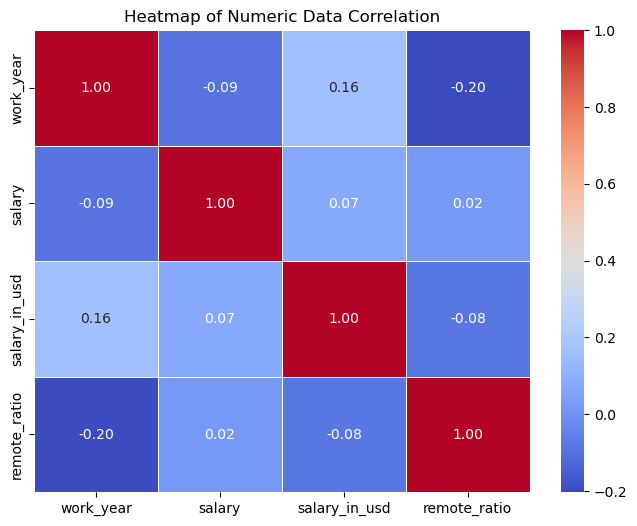

In [8]:
# Chọn các cột số từ DataFrame
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Tạo ma trận tương quan
correlation_matrix = numeric_columns.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numeric Data Correlation')
plt.show()

### 7.1. Phần trăm giá trị còn thiếu là bao nhiêu?

In [9]:
numerical_df_null = (numerical_df.isnull().sum() / len(df)) * 100

print("Tỷ lệ phần trăm giá trị thiếu cho mỗi thuộc tính số:")
print(numerical_df_null)

Tỷ lệ phần trăm giá trị thiếu cho mỗi thuộc tính số:
work_year       0.00000
salary          0.00000
salary_in_usd   0.00000
remote_ratio    0.00000
dtype: float64


### 7.2. Giá trị nhỏ nhất? Giá trị lớn nhất? Các giá trị này có gì bất thường không?

In [10]:
numerical_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,10456.00000,10456.00000,10456.00000,10456.00000
mean,2022.77888,170465.52343,149263.49990,36.49101
std,0.50694,419598.88020,65269.39374,47.58074
min,2020.00000,14000.00000,15000.00000,0.00000
25%,2023.00000,105000.00000,104640.25000,0.00000
50%,2023.00000,143000.00000,142200.00000,0.00000
75%,2023.00000,188275.00000,185900.00000,100.00000
max,2023.00000,30400000.00000,750000.00000,100.00000


In [11]:
min_values = numerical_df.min()
print("Giá trị nhỏ nhất:")
print(min_values)

Giá trị nhỏ nhất:
work_year         2020
salary           14000
salary_in_usd    15000
remote_ratio         0
dtype: int64


In [12]:
max_values = numerical_df.max()
print("Giá trị lớn nhất:")
print(max_values)

Giá trị lớn nhất:
work_year            2023
salary           30400000
salary_in_usd      750000
remote_ratio          100
dtype: int64


- Các giá trị không có gì là bất thường.

## 8. Với mỗi cột mang giá trị phân loại, các giá trị được phân bố như thế nào?

In [13]:
categorical_df.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,10456,10456,10456,10456,10456,10456,10456
unique,4,4,132,22,86,75,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,7325,10410,2390,9569,9023,9072,9448


### 8.1. Phần trăm giá trị còn thiếu là bao nhiêu?

In [14]:
categorical_df_null = (categorical_df.isnull().sum() / len(df)) * 100

print("Tỷ lệ phần trăm giá trị thiếu cho mỗi thuộc tính phân loại:")
print(categorical_df_null)

Tỷ lệ phần trăm giá trị thiếu cho mỗi thuộc tính phân loại:
experience_level     0.00000
employment_type      0.00000
job_title            0.00000
salary_currency      0.00000
employee_residence   0.00000
company_location     0.00000
company_size         0.00000
dtype: float64


### 8.2. Mỗi cột có bao nhiêu giá trị khác nhau?

- Cột `experience_level`:

In [15]:
unique_experience_level = categorical_df["experience_level"].unique()
print(f"Cột experience_level có {len(unique_experience_level)} giá trị khác nhau.")
print("Các giá trị đó là:")
for i in unique_experience_level:
    print(f"- {i}")

Cột experience_level có 4 giá trị khác nhau.
Các giá trị đó là:
- SE
- MI
- EN
- EX


- Cột `employment_type`:

In [16]:
unique_employment_type = categorical_df["employment_type"].unique()
print(f"Cột employment_type có {len(unique_employment_type)} giá trị khác nhau.")
print("Các giá trị đó là:")
for i in unique_employment_type:
    print(f"- {i}")

Cột employment_type có 4 giá trị khác nhau.
Các giá trị đó là:
- FT
- PT
- CT
- FL


- Cột `job_title`:

In [17]:
unique_job_title = categorical_df["job_title"].unique()
print(f"Cột job_title có {len(unique_job_title)} giá trị khác nhau.")
print("5 giá trị đầu tiên đó là:")
for i in range(len(unique_job_title)):
    if i > 4:
        break
    print(f"- {unique_job_title[i]}")

Cột job_title có 132 giá trị khác nhau.
5 giá trị đầu tiên đó là:
- Data Modeler
- Data Science Manager
- Research Analyst
- Data Engineer
- Data Analyst


- Cột `salary_currency`:

In [18]:
unique_salary_currency = categorical_df["salary_currency"].unique()
print(f"Cột salary_currency có {len(unique_salary_currency)} giá trị khác nhau.")
print("5 giá trị đầu tiên đó là:")
for i in range(len(unique_salary_currency)):
    if i > 4:
        break
    print(f"- {unique_salary_currency[i]}")

Cột salary_currency có 22 giá trị khác nhau.
5 giá trị đầu tiên đó là:
- USD
- EUR
- GBP
- CAD
- AUD


- Cột `employee_residence`:

In [19]:
unique_employee_residence = categorical_df["employee_residence"].unique()
print(f"Cột employee_residence có {len(unique_employee_residence)} giá trị khác nhau.")
print("5 giá trị đầu tiên đó là:")
for i in range(len(unique_employee_residence)):
    if i > 4:
        break
    print(f"- {unique_employee_residence[i]}")

Cột employee_residence có 86 giá trị khác nhau.
5 giá trị đầu tiên đó là:
- US
- DE
- GB
- ZA
- AU


- Cột `company_location`:

In [20]:
unique_company_location = categorical_df["company_location"].unique()
print(f"Cột company_location có {len(unique_company_location)} giá trị khác nhau.")
print("5 giá trị đầu tiên đó là:")
for i in range(len(unique_company_location)):
    if i > 4:
        break
    print(f"- {unique_company_location[i]}")

Cột company_location có 75 giá trị khác nhau.
5 giá trị đầu tiên đó là:
- US
- DE
- GB
- ZA
- AU


- Cột `company_size`:

In [21]:
unique_company_size = categorical_df["company_size"].unique()
print(f"Cột company_size có {len(unique_company_size)} giá trị khác nhau.")
print("Các giá trị đó là:")
for i in unique_company_size:
    print(f"- {i}")

Cột company_size có 3 giá trị khác nhau.
Các giá trị đó là:
- M
- L
- S


### 8.3. Các giá trị này có gì bất thường không?
- Các giá trị không có gì là bất thường. 
- Tuy nhiên trong cột `nghề nghiệp (job_title)` có quá nhiều nghề nghiệp, ta có thể rút gọn các nghề có điểm chung này vào một lĩnh vực.

# C. Đưa ra câu hỏi có ý nghĩa và trả lời câu hỏi

## Câu hỏi 1: 
- Nội dung: Mức lương trung bình trong lĩnh vực Khoa học Dữ liệu thay đổi như thế nào qua các năm gần đây?
- Ý nghĩa: Có cái nhìn tổng quan về sự thay đổi mức lương trung bình trong lĩnh vực Khoa học Dữ liệu qua các năm gần đây. Từ đó có thể rút ra xu hướng phát triển của lĩnh vực này.
- Tiền xử lý dữ liệu: 
    - Câu hỏi không cần tiền xử lý.
- Phân tích dữ liệu:
    - Ta nhóm dữ liệu dựa trên `năm làm việc (work_year)` và tính mức lương trung bình dựa trên `mức lương (salary_in_usd)`.
    - Sau đó ta làm tròn mức lương trung bình lên 2 chữ số thập phân.
    - Vẽ biểu đồ đường để xem sự thay đổi mức lương trung bình qua các năm.

In [22]:
# Nhóm dữ liệu dựa trên năm làm viecj và tính mức lương trung bình
salary_through_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()
salary_through_year.rename(columns = {"salary_in_usd":"mean_salary_usd"}, inplace = True)
salary_through_year["mean_salary_usd"] = salary_through_year["mean_salary_usd"].round(2)
salary_through_year

,work_year,mean_salary_usd
0,2020,102250.87000
1,2021,99922.07000
2,2022,134449.14000
3,2023,153814.83000


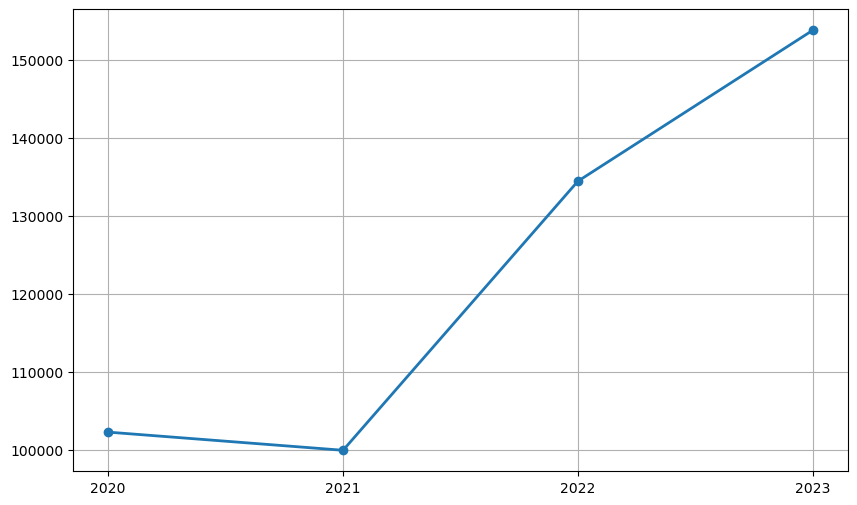

In [23]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10,6))
plt.plot(salary_through_year["work_year"], salary_through_year["mean_salary_usd"], 
         marker="o", linestyle="-", linewidth=2, markersize=6)
plt.xticks([2020, 2021, 2022, 2023])
plt.grid(True)
plt.show()

- Nhận xét:
    - Mức lương có mức độ giảm nhẹ từ năm 2020 qua năm 2021. Nguyên nhân lớn nhất có thể là do `đại dịch COVID-19` đã khiến một số người bị giảm lương hay mất việc, từ đó khiến mức lương trung bình cũng giảm theo.
    - Mức lương có xu hướng tăng manh từ năm 2021 sang năm 2022 và tiếp tục tăng từ năm 2022 sang năm 2023. Lúc này nền kinh tế đã có dấu hiệu phục hồi, các doanh nghiệp hoặc ngành nghề có thêm cơ hội việc làm và tăng mức lương để giữ và thu hút nhân sự. Đồng thời cho thấy lĩnh vực Khoa học dữ liệu rất được ưu chuộng và là xu hướng nghề nghiệp được quan tâm rât nhiều.

## Câu hỏi 2: 
- Nội dung: Quốc gia nào cung cấp nguồn thu nhập tốt nhất trong lĩnh vực Khoa học Dữ liệu khi họ lựa chọn ngành nghề?
- Ý nghĩa:
    - Đánh giá mức thu nhập trong lĩnh vực Khoa học Dữ liệu tại các quốc gia khác nhau.
    - Hiểu rõ về cơ hội thu nhập ở mức quốc gia và xác định những quốc gia nào có điều kiện thuận lợi hơn đề có thể hỗ trợ quyết định về việc chọn quốc gia để theo đuổi sự nghiệp trong lĩnh vực Khoa học Dữ liệu
- Tiền xử lý:
    - Do `vị trí công ty (company_location)` đang ở dạng mã ISO 3166-1 alpha-2 nên ta sẽ chuyển sang tên quốc gia dựa trên dạng mã đó.
    - Bảng mã ISO 3166-1 alpha-2 ta sẽ lấy trên Wikipedia [tại đây](https://vi.wikipedia.org/wiki/ISO_3166-1_alpha-2).
    - Sau đó ta sẽ kết hợp 2 bộ dữ liệu lại dựa trên mã ISO 3166-1 alpha-2 và đặt tên dữ liệu mới là `df_iso`.
- Phân tích dữ liệu:
    - Ta nhóm dữ liệu dựa trên `tên quốc gia (country_name)` và tính mức lương trung bình dựa trên `mức lương (salary_in_usd)`.
    - Sau đó ta làm tròn mức lương trung bình lên 2 chữ số thập phân và sắp xếp dữ liệu giảm dần.
    - Trực quan 10 nước có mức lương trung bình cao nhất, đồng thời xem qua mức lương trung bình ở Việt Nam.

In [24]:
# Đọc bảng mã ISO 3166-1 alpha-2
iso = pd.read_html("https://vi.wikipedia.org/wiki/ISO_3166-1_alpha-2", match="Alpha-2")[0]
iso.rename(columns={"Tên quốc gia": "country_name"}, inplace=True)
iso.drop(["Ghi chú"], axis=1, inplace=True)

# Nối hai tập dữ liệu lại
df_iso = pd.merge(df, iso, left_on="company_location", right_on="Alpha-2", how="left")

# Nhóm dữ liệu dựa trên tên quốc gia và tính mức lương trung bình
average_salary_by_country = df_iso.groupby("country_name")["salary_in_usd"].mean().reset_index()
average_salary_by_country.rename(columns={"salary_in_usd": "mean_salary_usd"}, inplace=True)
average_salary_by_country["mean_salary_usd"] = average_salary_by_country["mean_salary_usd"].round(2)
average_salary_by_country = average_salary_by_country.sort_values(by="mean_salary_usd", ascending=False).reset_index(drop=True)
average_salary_by_country

,country_name,mean_salary_usd
0,Qatar,300000.00000
1,Israel,217332.00000
2,Puerto Rico,167500.00000
3,United States,157536.04000
4,New Zealand,151634.33000
5,Canada,144004.46000
6,Ả Rập Saudi,134999.00000
7,Australia,127624.77000
8,Ukraina,121333.33000
9,Bosnia and Herzegovina,120000.00000


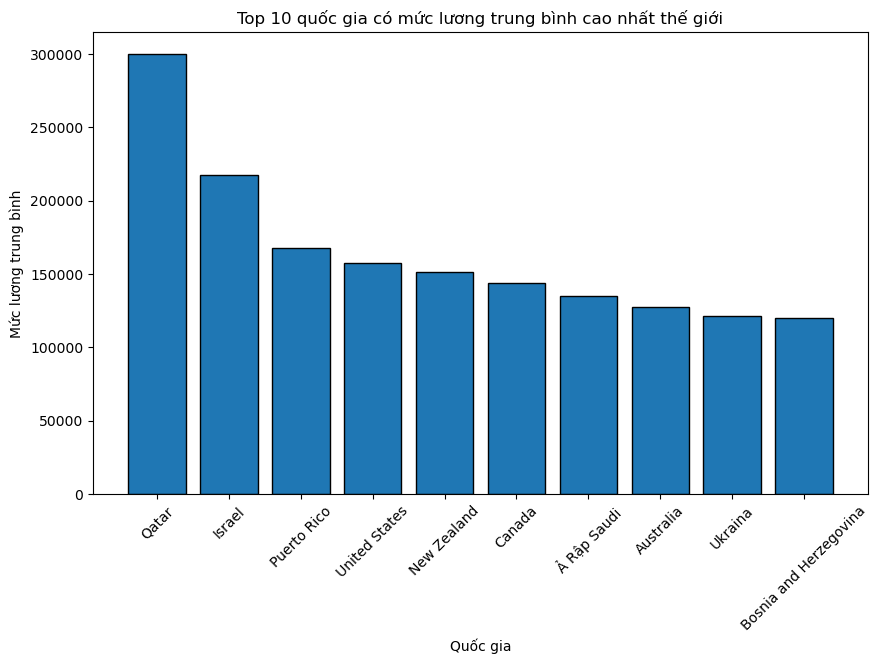

In [25]:
top_10_salary = average_salary_by_country.iloc[:10]
plt.figure(figsize=(10,6))
plt.bar(top_10_salary["country_name"], top_10_salary["mean_salary_usd"], edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Quốc gia")
plt.ylabel("Mức lương trung bình")
plt.title("Top 10 quốc gia có mức lương trung bình cao nhất thế giới")
plt.show()

In [26]:
vn_salary = average_salary_by_country.loc[average_salary_by_country["country_name"] == "Viet Nam"]
salary = vn_salary["mean_salary_usd"].values[0]
index = vn_salary["mean_salary_usd"].index[0] + 1 
print(f"Mức thu nhập trung bình hàng năm của Việt Nam là {salary} và đứng thứ {index} thế giới.")

Mức thu nhập trung bình hàng năm của Việt Nam là 63000.0 và đứng thứ 38 thế giới.


- Nhận xét:
    - Tổng quan:
        - Quốc gia trả lương cao nhất đó là Qatar với mức lương trung bình là 300000 USD và Israel với mức lương trung bình là	217332 USD. Đây là các quốc gia đều nằm ở Trung Đông.
        - Quốc gia trả lương thấp nhất nhất đó là Ecuador và mức lương trung bình là 16000.
        - Trong top 10 quốc gia trả lương cao nhất, có đến 5 quốc gia có ngôn ngữ chính thức là tiếng Anh: Puerto Rico, United States, New Zealand, Canada, Australia.
    - Việt Nam:
        - Mức thu nhập trung bình hàng năm của Việt Nam là 63000 USD (~ 1.5 tỷ VND) và đứng thứ 38 thế giới. Đây là một mức lương khá cao nếu so với mức thu nhập ở Việt Nam.
        - Khi xem xét lại dữ liệu, để đạt mức lương như trên, thì đa số đều là những người ở trình độ Mid-level / Intermediate, trở lên, thời gian làm việc là Full-time và làm việc trong công ty vừa và lớn trở lên.

## Câu hỏi 3: 
- Nội dung: Tình hình làm việc từ xa (remote work) trong lĩnh vực Data Science phản ánh như thế nào qua các năm, và có sự ảnh hưởng của kích thước công ty không?
- Ý nghĩa:
    - Làm việc từ xa có ảnh hưởng như thế nào đối với hiệu suất và sự phát triển của các chuyên gia Data Science?
    - Liệu có sự chênh lệch trong cách các công ty lớn và nhỏ xử lý việc làm việc từ xa trong lĩnh vực này không?
- Tiền xử lý dữ liệu: 
    - Chọn cột liên quan: Chọn cột "work_year", "remote_ratio", và "company_size" từ DataFrame.
    - Xử lý giá trị thiếu: Kiểm tra và xử lý giá trị thiếu trong các cột cần thiết.
    - Kiểm tra và xử lý dữ liệu không hợp lý: Đảm bảo rằng các giá trị của "remote_ratio" nằm trong phạm vi hợp lý (ví dụ: từ 0 đến 100) và kiểm tra tính hợp lý của "work_year" và "company_size".
- Phân tích dữ liệu:
    - Phân loại dữ liệu: Phân loại dữ liệu theo năm làm việc và kích thước công ty.
    - Tính trung bình remote_ratio: Tính giá trị trung bình của cột "remote_ratio" cho từng năm.
    - Tính trung bình remote_ratio theo kích thước công ty: Tính giá trị trung bình của "remote_ratio" cho từng phân khúc kích thước công ty.

In [27]:
# Tiền xử lý
questions1_columns = ["work_year", "remote_ratio", "company_size"]
filtered_df = df[questions1_columns].copy()

# Xử lý giá trị thiếu
filtered_df.dropna(subset=["remote_ratio"], inplace=True)

# Kiểm tra và xử lý giá trị không hợp lý
filtered_df = filtered_df[(filtered_df["remote_ratio"] >= 0) & (filtered_df["remote_ratio"] <= 100)]

# Phân tích dữ liệu
average_remote_by_year = filtered_df.groupby("work_year")["remote_ratio"].mean()
average_remote_by_size = filtered_df.groupby("company_size")["remote_ratio"].mean()

In [28]:
print("Trung bình remote_ratio theo năm:")
print(average_remote_by_year)

Trung bình remote_ratio theo năm:
work_year
2020   62.00000
2021   69.95413
2022   55.20896
2023   31.77867
Name: remote_ratio, dtype: float64


In [29]:
print("Trung bình remote_ratio theo kích thước công ty:")
print(average_remote_by_size)

Trung bình remote_ratio theo kích thước công ty:
company_size
L   40.08363
M   35.55250
S   70.76023
Name: remote_ratio, dtype: float64


- Nhận xét
    - Theo năm:
        - Từ năm 2020 đến năm 2021, trung bình tỷ lệ làm việc từ xa tăng đáng kể, từ 62% lên 69.95%. Điều này có thể phản ánh xu hướng chung trong ngành Data Science hỗ trợ và khuyến khích làm việc từ xa(do dịch Covid).
        - Tuy nhiên, từ năm 2022 đến năm 2023, có một giảm đột ngột xuống còn 31.78%. Điều này có thể là do nhiều yếu tố như thay đổi chính sách công ty, tình hình kinh tế, hoặc yếu tố ngoại vi khác.
    - Theo kích thước công ty:
        - Các công ty có kích thước nhỏ (S) có trung bình tỷ lệ làm việc từ xa cao nhất, đạt 70.76%. Điều này có thể do các công ty nhỏ linh hoạt hơn trong việc triển khai mô hình làm việc từ xa.
        - Các công ty có kích thước lớn (L) và trung bình (M) có tỷ lệ làm việc từ xa tương đối thấp hơn, lần lượt là 40.08% và 35.55%. Có thể do các công ty lớn gặp khó khăn hơn trong việc triển khai và duy trì mô hình làm việc từ xa.
- Tổng quan:
    - Cần tìm hiểu, phân tích chi tiết hơn để hiểu rõ hơn về tại sao có sự biến động đột ngột trong năm 2023.
    - Có thể đề xuất thêm yếu tố như vùng địa lý, ngành nghề, hoặc các yếu tố ngoại vi khác để có cái nhìn toàn diện hơn về tình hình làm việc từ xa trong lĩnh vực Data Science.

## Câu hỏi 4: 
- Nội dung: Công việc nào được làm nhiều nhất ở mỗi quốc gia và mức lương trung bình của công việc đó?
- Ý nghĩa:
    - Điều này giúp xác định sự phổ biến của các ngành nghề cụ thể trong từng quốc gia.
    - Cung cấp thông tin hữu ích cho những người quan tâm đến xu hướng nghề nghiệp và thị trường lao động ở mức quốc gia.
    - Có thể hỗ trợ quyết định về sự nghiệp và hướng nghiệp dựa trên sự ưa chuộng của các công việc trong từng quốc gia cụ thể.
- Tiền xử lý dữ liệu: 
    - Do có quá nhiều công việc cụ thể nên ta sẽ nhóm các công việc có điểm chung lại thành một lĩnh vực.
    - Và xử lý tên quốc gia tương tự như câu hỏi trên.
- Phân tích dữ liệu:
    - Ta nhóm dữ liệu dựa trên `tên quốc gia (country_name)` và `tên nhóm công việc (job_group)`
    - Sau đó đếm nhóm công việc được xuất hiện nhiều nhất ứng với mỗi quốc gia đó và tính toán mức lương trung bình của njoms công việc đó.
    - Ta sắp xếp số lượng xuất hiện thêm thứ tự giảm dần.

In [30]:
# Đọc bảng mã ISO 3166-1 alpha-2
iso = pd.read_html("https://vi.wikipedia.org/wiki/ISO_3166-1_alpha-2", match="Alpha-2")[0]
iso.rename(columns={"Tên quốc gia": "country_name"}, inplace=True)
iso.drop(["Ghi chú"], axis=1, inplace=True)

# Nối hai tập dữ liệu lại
df_iso_job = pd.merge(df, iso, left_on="company_location", right_on="Alpha-2", how="left")

# Nhóm các công việc có điểm chung thành một lĩnh vực
with open("./data/job_group.json") as job_group_json:
    job_group = json.load(job_group_json)

df_iso_job["job_group"] = df_iso["job_title"].map(job_group)

# Nhóm dữ liệu dựa trên tên quốc gia và đếm công việc được xuất hiện nhiều nhất ứng với mỗi quốc gia đó.
jobs_by_country = df_iso_job.groupby(["country_name", "job_group"]).size().reset_index(name="job_count")
jobs_by_country["mean_salary"] = df_iso_job.groupby(["country_name", "job_group"])["salary_in_usd"].mean().values
max_jobs_by_country = jobs_by_country.loc[jobs_by_country.groupby("country_name")["job_count"].idxmax()]
max_jobs_by_country = max_jobs_by_country.sort_values(by="job_count", ascending=False).reset_index(drop=True)
max_jobs_by_country

,country_name,job_group,job_count,mean_salary
0,United States,Data Engineer,2885,153464.49289
1,United Kingdom,Data Engineer,169,92382.65089
2,Canada,Data Scientist,76,160749.90789
3,Tây Ban Nha,Data Scientist,63,56102.41270
4,Đức,Data Scientist,26,85975.76923
5,Pháp,Data Scientist,20,64322.50000
6,India,Data Scientist,19,37148.00000
7,Hà Lan,Data Scientist,10,81540.60000
8,Colombia,Data Engineer,10,81500.00000
9,Bồ Đào Nha,Data Engineer,9,49964.66667


- Nhận xét:
    - Data Engineer:
        - Là công việc phổ biến nhất tại nhiều quốc gia như Hoa Kỳ, Anh, Colombia, Hy Lạp, Argentina, và nhiều quốc gia khác.
        - Số lượng công việc Data Engineer ở Hoa Kỳ đáng chú ý với 2885, cho thấy sự phát triển mạnh mẽ trong lĩnh vực này.
    - Data Scientist:
        - Là một trong những công việc quan trọng và được tìm kiếm ở nhiều quốc gia như Canada, Tây Ban Nha, Đức, Pháp, Ấn Độ, và nhiều quốc gia khác.
        - Số lượng công việc Data Scientist ở Canada và Tây Ban Nha tương đối cao, đặc biệt là với mức lương trung bình khá hấp dẫn.
    - Machine Learning Engineer:
        - Có sự tăng trưởng trong ngành nghề này ở một số quốc gia như Úc, Việt Nam, Nhật Bản, Hàn Quốc, và UAE.
        - Mức lương trung bình ở Úc và UAE đều khá cao trong lĩnh vực Machine Learning Engineer.
    - AI Engineer:
        - Là một lĩnh vực đang phát triển, thể hiện qua sự xuất hiện ở nhiều quốc gia như Ukraine, Qatar, Phần Lan, Israel, và nhiều quốc gia khác.
        - Mức lương của AI Engineer có sự đa dạng lớn, từ mức thấp đến rất cao, như ở Qatar và Israel.
    - Data Analyst:
        - Công việc này xuất hiện ở nhiều quốc gia với số lượng công việc tương đối đồng đều.
        - Mức lương của Data Analyst thường ở mức trung bình, có sự đa dạng tùy thuộc vào quốc gia.

## Câu hỏi 5: 
- Nội dung: Xu hướng tuyển dụng công việc của các công ty lớn khi tuyển dụng các công việc: Data Engineer, Data Scientist và Data Analyst qua các năm
- Ý nghĩa:
    - Cung cấp cái nhìn tổng quan về sự phát triển của ngành công nghiệp dữ liệu, trong đó có các vai trò quan trọng như Data Engineer, Data Scientist và Data Analyst. 
    - Thông qua việc theo dõi xu hướng tuyển dụng của các công ty lớn, ta có thể đánh giá sự thay đổi trong nhu cầu nhân sự của họ trong các lĩnh vực này qua các năm. Điều này có thể cung cấp thông tin quan trọng cho sinh viên, chuyên gia ngành, và những người quan tâm đến sự phát triển nghề nghiệp trong lĩnh vực dữ liệu.
- Tiền xử lý dữ liệu: 
    - Câu hỏi không cần tiền xử lý.
- Phân tích dữ liệu:
    - Ta lọc dữ liệu dựa trên nhóm công việc: Data Engineer, Data Scientist, Data Analyst và quy mô công ty là lớn.
    - Trực quan bằng biểu đồ cột (bar plot) và đưa ra nhận xét.

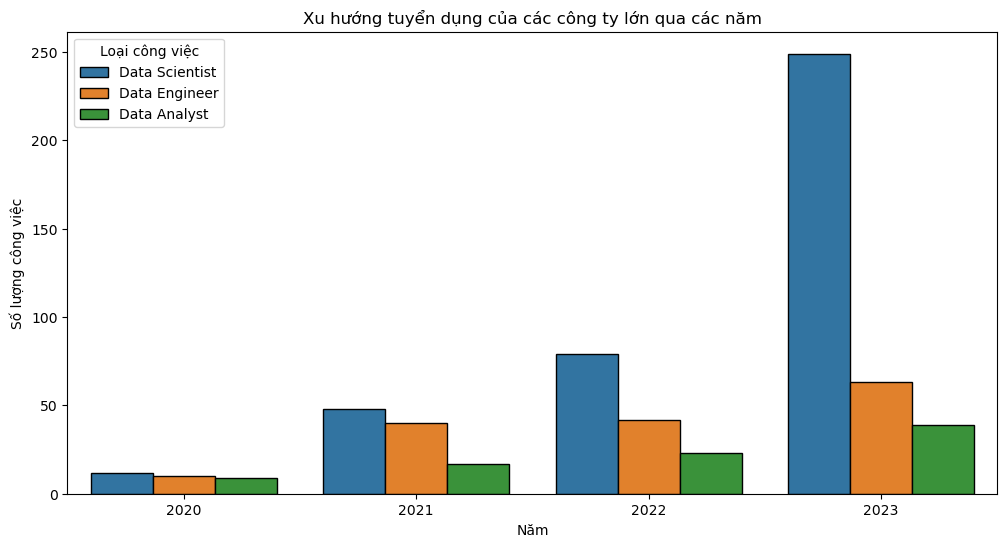

In [31]:
df_data_company = df_iso_job.loc[(df_iso_job["job_group"].isin(["Data Engineer", "Data Scientist", "Data Analyst"])) & 
                                 (df_iso_job["company_size"] == "L")]

plt.figure(figsize=(12, 6))
sns.countplot(x="work_year", hue="job_group", data=df_data_company, edgecolor="black")
plt.title("Xu hướng tuyển dụng của các công ty lớn qua các năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng công việc")
plt.legend(title="Loại công việc", loc='upper left')
plt.show()

- Nhận xét:
    - Số lượng tuyển dụng giữa các công việc ở các công ty lớn tăng dần qua các năm từ 2020 - 2023.
    - Số lượng tuyển dụng ở năm 2020 giữa các công việc ở các công ty lớn là tương đối đều.
    - Bước sang các năm tiếp theo, số lượng tuyển dụng bắt đầu có sự chênh lệch rất lớn khi Data Scientist có số lượng tuyển dụng vượt trội so với hai loại công việc còn lại.
    - Đặc biệt là năm 2023 khi số lượng tuyển dụng của Data Scientist tăng một cách đột biến và bỏ xa hai loại công việc còn lại. Điều này chứng tỏ Data Scientist đang là ưu tiên hàng đầu của các công ty lớn.

## Câu hỏi 6: 
- Nội dung: So sánh mức lương trung bình giữa các loại hình lao động của các mức độ kinh nghiệm làm việc.
- Ý nghĩa:
    - Hiểu biến động lương theo loại hình lao động: So sánh mức lương giữa các loại hình lao động (như Full time, Part time, Contract, Freelance) giúp nhận biết sự chênh lệch trong mức lương trung bình giữa những hình thức làm việc khác nhau. Điều này có thể phản ánh sự đánh giá và định giá của thị trường đối với từng loại hình lao động.
    - Phân loại theo mức độ kinh nghiệm: Việc so sánh lương trung bình theo mức độ kinh nghiệm (như Entry-level, Mid-level, Senior-level, Executive-level) giúp xác định xu hướng mức lương tương ứng với sự gia tăng kinh nghiệm làm việc. Điều này có thể hỗ trợ những quyết định liên quan đến phát triển sự nghiệp và chọn lựa mức độ kinh nghiệm phù hợp.
    - Thông tin hữu ích cho quản lý nhân sự: Thông tin này cung cấp cái nhìn sâu sắc về cách mức lương phản ánh mức độ kinh nghiệm và loại hình lao động. Điều này có thể hỗ trợ quyết định về chính sách lương, chính sách nhân sự và thu hút tài năng.
- Tiền xử lý dữ liệu:
    - Không cần tiền xử lý
- Phân tích dữ liệu:
    - Trực quan bằng biểu đồ cột (bar plot) và đưa ra nhận xét.

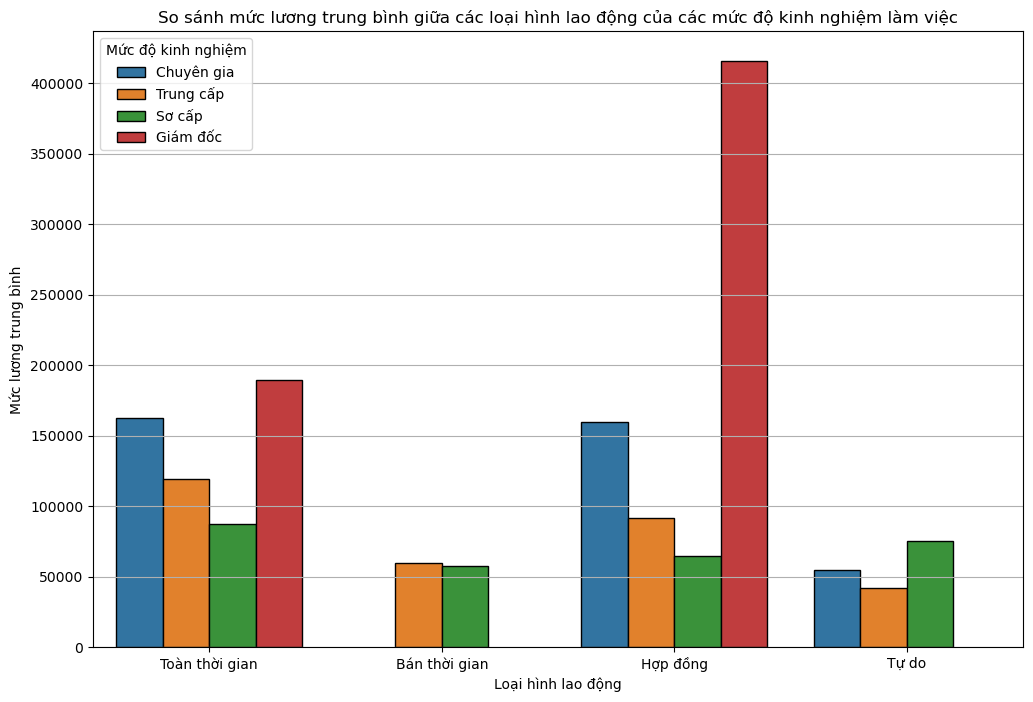

In [32]:
plt.subplots(figsize=(12, 8))
plt.grid()
ax = sns.barplot(data=df, x="employment_type", y="salary_in_usd", hue="experience_level", 
                 errorbar=None, edgecolor="black")
ax.set_title("So sánh mức lương trung bình giữa các loại hình lao động của các mức độ kinh nghiệm làm việc")
ax.set_xlabel("Loại hình lao động")
ax.set_xticklabels(["Toàn thời gian", "Bán thời gian", "Hợp đồng", "Tự do"])
ax.set_ylabel("Mức lương trung bình")
plt.legend(title="Mức độ kinh nghiệm", labels=["Chuyên gia", "Trung cấp", "Sơ cấp", "Giám đốc"])
plt.show()

- Nhận xét:
    - Với mức độ kinh nghiệm là `Giám đốc` thì hình thức làm việc chủ yếu là `toàn thời gian` và `hợp đồng` với mức lương được trả  rất cao.
    - Với mức độ kinh nghiệm là `Chuyên gia` thì khi hình thức làm việc chủ yếu là `tự do` có mức lương thấp hơn đáng kể khi so với làm việc `toàn thời gian` hay `hợp đồng`.
    - Khi hình thức làm việc là `bán thời gian` thì những người với mức độ kinh nghiệm `Chuyên gia` trở lên sẽ bỏ qua hình thức này và chênh lệch mức lương giữa các mức độ kinh nghiệm là hầu như không có. Đây là điểm yếu của hình thức làm việc là `bán thời gian` khi không cung cấp đủ phúc lợi cho người làm việc.

# D. Nhìn lại quá trình làm đồ án
- 19120590 - Huỳnh Thanh Mỹ:
    - Khó khăn:
        - Gặp khó khăn trong việc lựa chọn dataset.
        - Khó khăn trong việc merge dữ liệu bằng github.
    - Những gì đã học được:
        - Biết đặt những câu hỏi ý nghĩa cho việc phân tích dữ liệu.
        - Cách làm việc nhóm, tự lên kế hoạch và phân công công việc phù hợp.
- 19120606 - Nguyễn Đình Hoàng Nguyên:
    - Khó khăn:
        - Dữ liệu chưa đủ lớn để đưa ra các phân tích chính xác nhất.
    - Những gì đã học được:
        - Cách xử lý và phân tích dữ liệu.
        - Sử dụng Github để quản lý đồ án.
- Nếu có thêm thời gian, nhóm sẽ:
    - Kiếm thêm dữ liệu để đưa ra các phân tích chính xác nhất.
    - Xây dựng mô hình dự đoán.
- Phân công công việc: [Xem tại đây](https://docs.google.com/spreadsheets/d/1yCc-c0SH010qxMk4XSCUfZFLiUvuD5p70btdb0l9YhU/edit?usp=sharing)

# F. Tài liệu tham khảo
- Bài giảng trên lớp.
- Bài tập Thực hành.
- [NumPy documentation](https://numpy.org/)
- [Pandas documentation](https://pandas.pydata.org/)
- [Matplotlib documentation](https://matplotlib.org/)
- [Seaborn documentation](https://seaborn.pydata.org/)